# Prediction using Supervised ML
Predict the percentage of a student based on the no. of study hours.  

# Author:-
### Kaibalya Pattnaik


In [86]:
import pandas as pd

In [87]:
import numpy as np


In [88]:
import matplotlib.pyplot as plt

IMPORTING DATASET

In [133]:
dataset = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


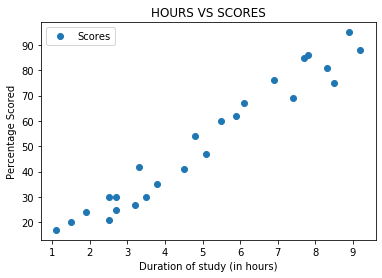

In [ ]:
dataset.plot(x = "Hours", y = "Scores", style = "o" )
plt.title("HOURS VS SCORES")
plt.xlabel("Duration of study (in hours)")
plt.ylabel("Percentage Scored")
plt.show()

PREPARATION OF DATA

In [124]:
input_data = dataset.iloc[: , :-1].values
print("THE INPUT DATA IS:- ",input_data)

THE INPUT DATA IS:-  [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [125]:
output_data = dataset.iloc[: ,1].values
print("OUTPUT DATA IS:- ", output_data)


OUTPUT DATA IS:-  [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


TRAINING

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
input_data_train, input_data_test, output_data_train, output_data_test =train_test_split(input_data, output_data, test_size = 0.2, random_state = 20)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
regressor = LinearRegression()
regressor.fit(input_data_train, output_data_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
regression_line = regressor.coef_ * input_data + regressor.intercept_

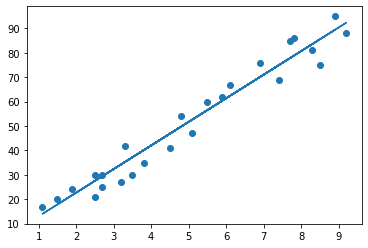

In [38]:
plt.scatter(input_data, output_data)
plt.plot(input_data, regression_line)

PREDICTION

In [77]:
print(input_data_test)

[[7.4]
 [6.9]
 [4.5]
 [3.5]
 [6.1]]


In [78]:
output_prediction = regressor.predict(input_data_test)
output_prediction

array([74.90959672, 70.0740592 , 46.86347911, 37.19240407, 62.33719917])

In [112]:
df = pd.DataFrame({"Actual Value": output_data_test, "Predicted Value": output_prediction})
df

,Actual Value,Predicted Value
0,69,74.909597
1,76,70.074059
2,41,46.863479
3,30,37.192404
4,67,62.337199


In [136]:
def study_hour(x):
    hour = np.array(x)
    score_prediction = regressor.predict(hour.reshape(1, -1))
    print("For {} hours of study, a student may score {} percentage of marks".format(x, score_prediction[0]))


In [137]:
study_hour(9.25)

For 9.25 hours of study, a student may score 92.80108554200021 percentage of marks


EVALUATION OF MODEL

In [138]:
from sklearn import metrics

In [140]:
print("Mean Absolute Error is", metrics.mean_absolute_error(output_data_test, output_prediction))

Mean Absolute Error is 5.91084430646127
